In [1]:
from google.colab import files
files.upload()

Saving CVPR.csv to CVPR.csv


{'CVPR.csv': b'X1,X2,Y\r\n76,29,0\r\n60,91,0\r\n66,35,0\r\n75,73,0\r\n33,98,1\r\n95,91,0\r\n97,49,0\r\n11,86,1\r\n18,31,1\r\n87,64,0\r\n56,11,0\r\n91,99,0\r\n75,36,0\r\n47,44,1\r\n47,56,1\r\n8,51,1\r\n84,60,0\r\n43,92,1\r\n90,68,0\r\n18,8,1\r\n51,47,0\r\n22,64,1\r\n4,82,1\r\n86,23,0\r\n30,28,1\r\n83,70,0\r\n68,68,0\r\n70,65,0\r\n58,93,0\r\n2,30,1\r\n38,17,1\r\n9,34,1\r\n58,23,0\r\n30,61,1\r\n90,91,0\r\n92,68,0\r\n72,28,0\r\n79,65,0\r\n51,33,0\r\n51,57,0\r\n82,12,0\r\n69,48,0\r\n97,14,0\r\n29,100,1\r\n56,73,0\r\n87,61,0\r\n34,47,1\r\n70,94,0\r\n51,90,0\r\n95,50,0\r\n100,99,0\r\n86,90,0\r\n29,15,1\r\n35,95,1\r\n19,77,1\r\n94,17,0\r\n56,8,0\r\n37,35,1\r\n83,97,0\r\n3,81,1\r\n19,97,1\r\n97,23,0\r\n51,7,0\r\n18,19,1\r\n66,81,0\r\n62,74,0\r\n58,63,0\r\n91,57,0\r\n94,75,0\r\n18,68,1\r\n33,57,1\r\n85,81,0\r\n2,36,1\r\n68,19,0\r\n94,29,0\r\n0,57,1\r\n35,57,1\r\n67,37,0\r\n15,4,1\r\n11,52,1\r\n33,68,1\r\n77,5,0\r\n45,43,1\r\n98,95,0\r\n21,74,1\r\n14,38,1\r\n40,41,1\r\n99,35,0\r\n31,13,1\r\n63,4,

In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import random
import math
import numpy as np
np.random.seed(0)

In [56]:
df = pd.read_csv('CVPR.csv')


In [77]:
XL= df["X1"].values.tolist()
YL = df["X2"].values.tolist()
X = np.array(list(zip(XL,YL)))
Y=(np.array( df["Y"].values.tolist())).reshape(101, 1)

In [113]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons =50
        outLayerNeurons = 1
        
        self.learning_rate = 0.1
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

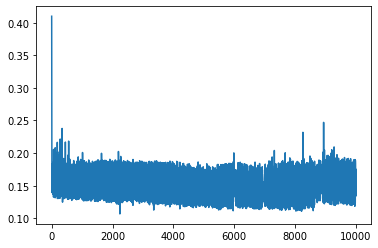

In [114]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [115]:
print(NN.feedForward([84,60]))

[0.00211692]


In [116]:
print(NN.feedForward([18, 8]))

[0.01579721]


In [117]:
print(NN.feedForward([43,92]))

[0.9665226]


In [118]:
print(NN.feedForward([90,68]))

[0.00250561]
